- For the web mining project, we will be using the IMDB Movie Reviews Dataset, which contains textual data reviews of various movies. The dataset is 50,000 movie reviews, 25,000 for training, and 25,000 for testing, with an equal amount of positive and negative reviews. 
- The analysis we will be performing on the dataset is sentiment analysis, classifying the movie reviews as positive or negative based on the content of the textual data. 
- The topics we incorporate are classifications, text preprocessing, and model evaluation. Classifications is implementing machine learning algorithms (Naive Bayes) to classify the reviews into positive or negative sentiments. 
- Text preprocessing is for cleaning and preparing text data for analysis. Model evaluation is for accuracy when using machine learning models; evaluating the performance of the classification models. 
- These topics will best serve my dataset and accurately classify movie reviews.
- https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [45]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from wordcloud import WordCloud

In [46]:
# Load the dataset
file_path = 'static/data/IMDB Dataset.csv'
data = pd.read_csv(file_path)

In [47]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [48]:
# Display data types and summary statistics
print("\nData Types:")
print(data.dtypes)

print("\nData Summary:")
print(data.describe(include='all'))


Data Types:
review       object
sentiment    object
dtype: object

Data Summary:
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [49]:
# Function to clean the text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove non-letters
    text = re.sub("[^a-zA-Z]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub("\s+", " ", text).strip()
    return text

# Apply the cleaning function to the review column
data['cleaned_review'] = data['review'].apply(clean_text)

# Analyze the cleaned dataset
sentiment_distribution = data['sentiment'].value_counts()
review_length = data['cleaned_review'].apply(len).describe()

# Display the sentiment distribution
print("Sentiment Distribution:")
print(sentiment_distribution)

# Display the review length summary
print("\nReview Length Summary:")
print(review_length)

C:\Users\nisha\AppData\Local\Temp\ipykernel_5068\2873904387.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Review Length Summary:
count    50000.000000
mean      1248.303360
std        944.475448
min         30.000000
25%        668.000000
50%        925.000000
75%       1514.000000
max      13308.000000
Name: cleaned_review, dtype: float64


In [50]:
# Display the first few rows of the dataset - after cleaning
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...


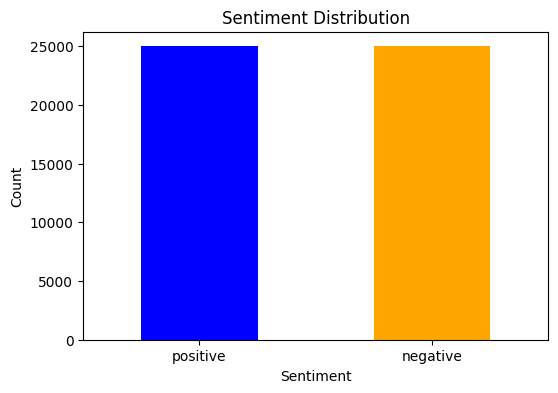

In [51]:
# Plot the sentiment distribution
plt.figure(figsize=(6,4))
sentiment_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

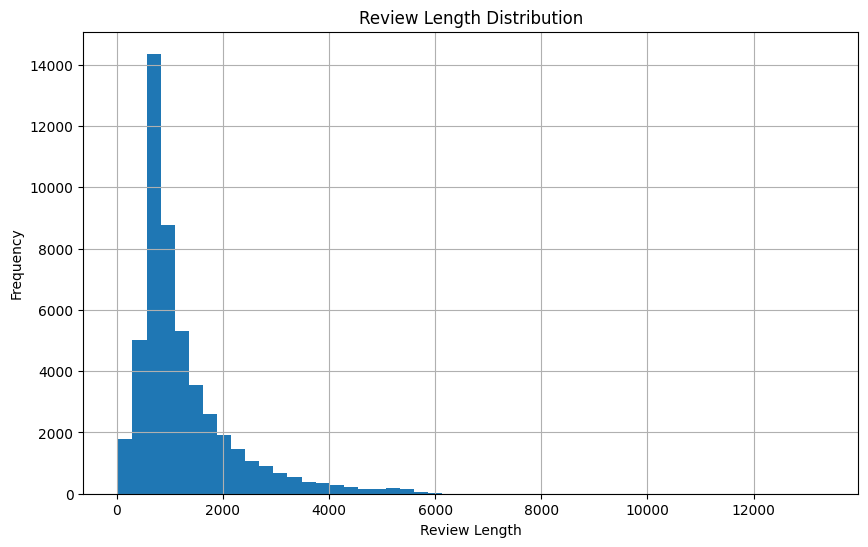

In [52]:
# Plot the review length distribution
plt.figure(figsize=(10,6))
data['cleaned_review'].apply(len).hist(bins=50)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [53]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_review'], data['sentiment'], test_size=0.5, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [54]:
# Predict the sentiments on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.85192
Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85     12483
    positive       0.85      0.86      0.85     12517

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



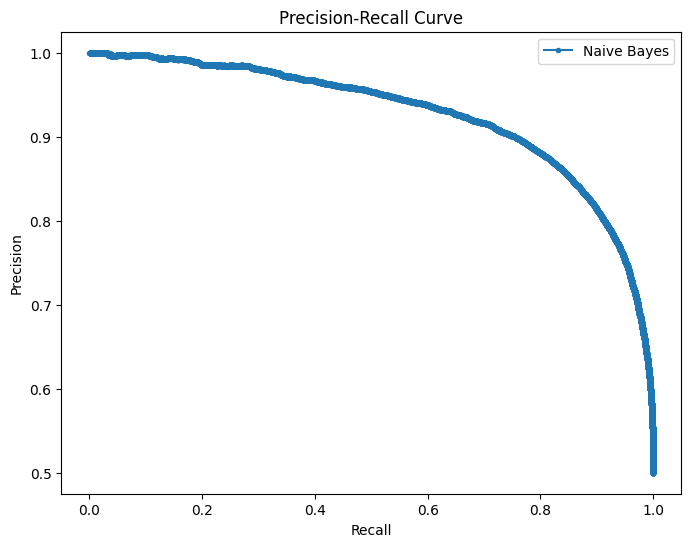

In [55]:
y_pred_prob = model.predict_proba(X_test_tfidf)

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:, 1], pos_label='positive')
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

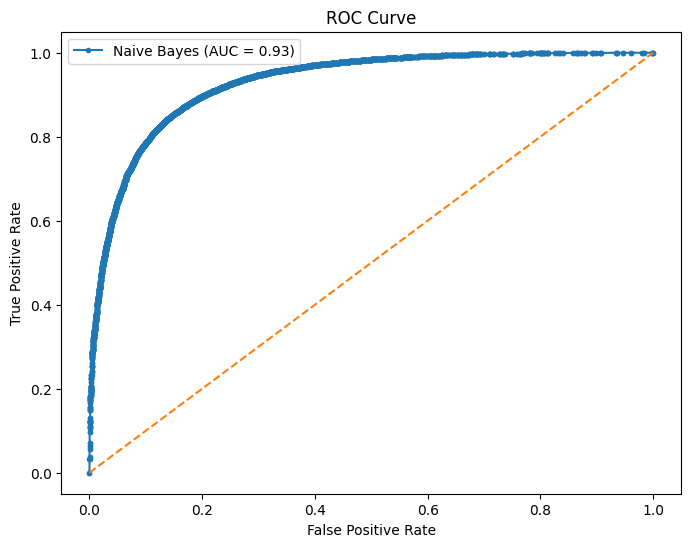

In [56]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1], pos_label='positive')
auc_score = roc_auc_score(y_test, y_pred_prob[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'Naive Bayes (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

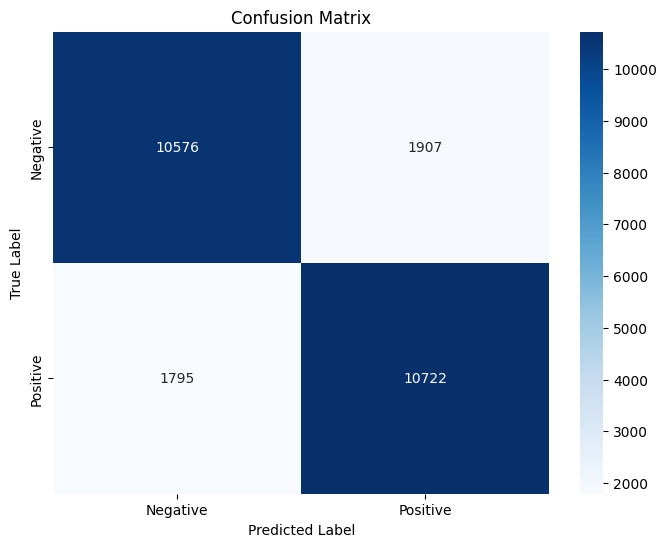

In [57]:
# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

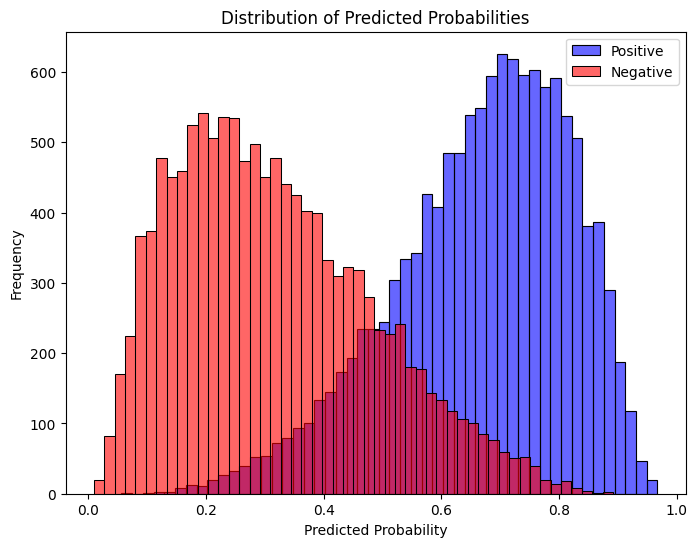

In [58]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_prob[y_test == 'positive'][:, 1], bins=50, color='blue', alpha=0.6, label='Positive')
sns.histplot(y_pred_prob[y_test == 'negative'][:, 1], bins=50, color='red', alpha=0.6, label='Negative')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

In [59]:
# Hyperparameter tuning
# Define the parameter grid for MultinomialNB
param_grid = {
    'alpha': [0.1, 0.5, 1.0]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'alpha': 0.5}


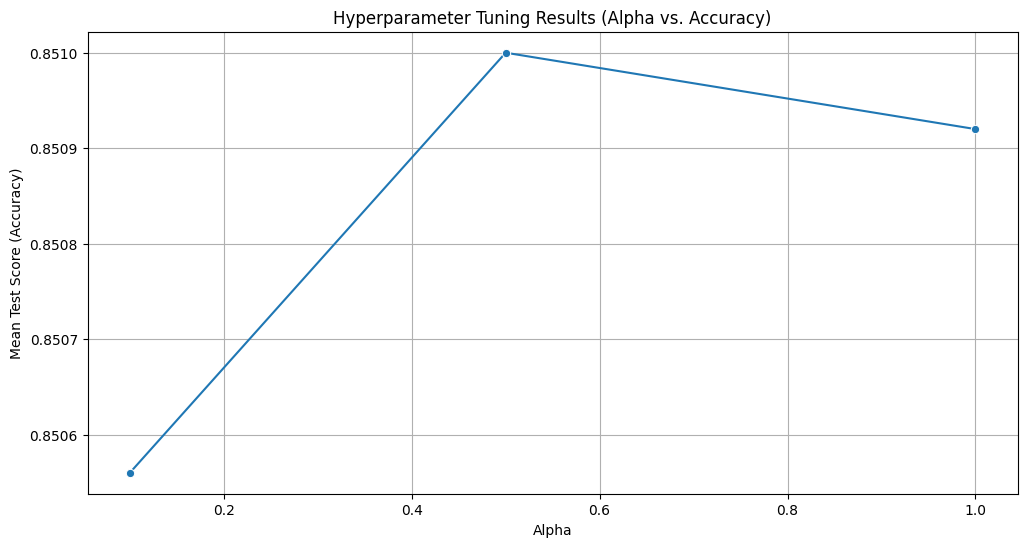

In [60]:
# Extract results from grid search
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12, 6))
sns.lineplot(x='param_alpha', y='mean_test_score', data=results, marker='o')
plt.title('Hyperparameter Tuning Results (Alpha vs. Accuracy)')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score (Accuracy)')
plt.grid(True)
plt.show()

In [61]:
# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.8528 0.8526 0.8462 0.8444 0.859 ]
Mean Cross-Validation Score: 0.851


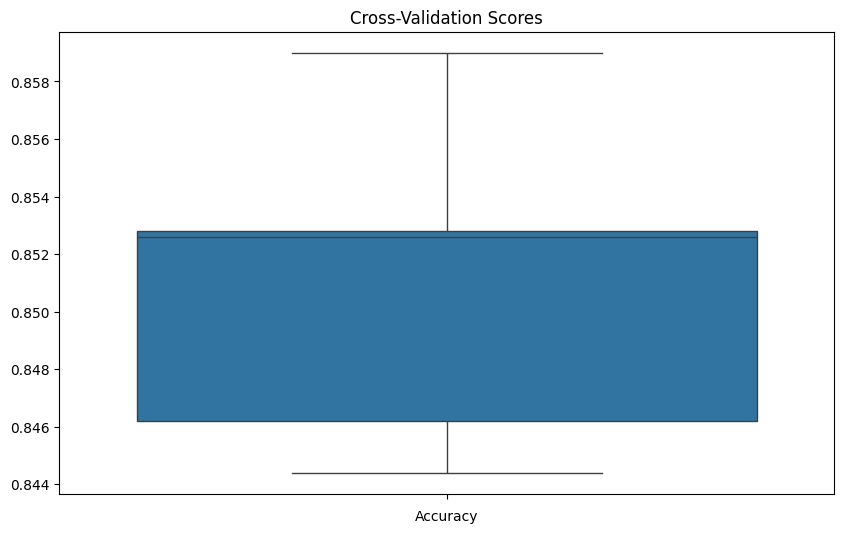

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(cv_scores)
plt.title('Cross-Validation Scores')
plt.xlabel('Accuracy')
plt.show()

In [63]:
# Get the misclassified examples
misclassified = X_test[y_test != y_pred]
misclassified_true_labels = y_test[y_test != y_pred]
misclassified_pred_labels = y_pred[y_test != y_pred]

# Display some examples of misclassified reviews
for i in range(5):
    print(f"Review: {misclassified.iloc[i]}")
    print(f"True Label: {misclassified_true_labels.iloc[i]}")
    print(f"Predicted Label: {misclassified_pred_labels[i]}")
    print("="*80)

Review: i really liked this summerslam due to the look of the arena the curtains and just the look overall was interesting to me for some reason anyways this could have been one of the best summerslam s ever if the wwf didn t have lex luger in the main event against yokozuna now for it s time it was ok to have a huge fat man vs a strong man but i m glad times have changed it was a terrible main event just like every match luger is in is terrible other matches on the card were razor ramon vs ted dibiase steiner brothers vs heavenly bodies shawn michaels vs curt hening this was the event where shawn named his big monster of a body guard diesel irs vs kid bret hart first takes on doink then takes on jerry lawler and stuff with the harts and lawler was always very interesting then ludvig borga destroyed marty jannetty undertaker took on giant gonzalez in another terrible match the smoking gunns and tatanka took on bam bam bigelow and the headshrinkers and yokozuna defended the world title 

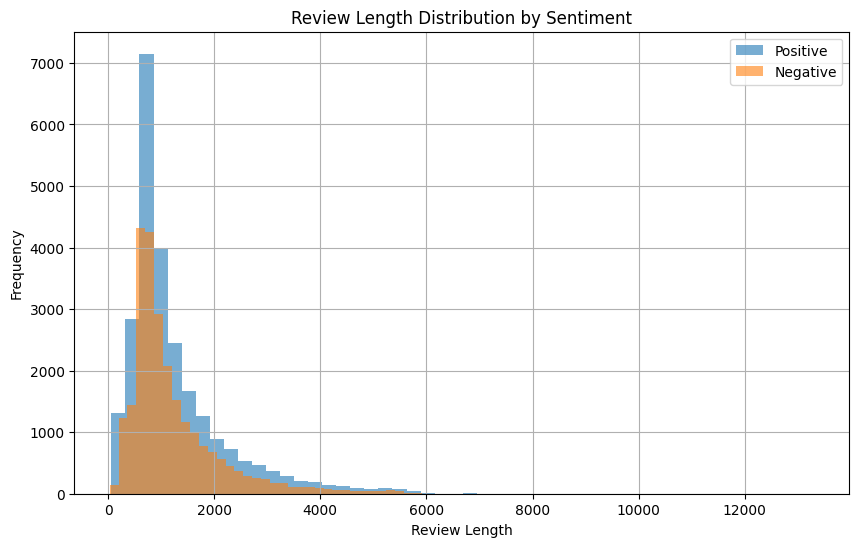

In [64]:
# Plot the distribution of review lengths for positive and negative reviews
data['review_length'] = data['cleaned_review'].apply(len)
plt.figure(figsize=(10,6))
data[data['sentiment'] == 'positive']['review_length'].hist(alpha=0.6, label='Positive', bins=50)
data[data['sentiment'] == 'negative']['review_length'].hist(alpha=0.6, label='Negative', bins=50)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [65]:
# Generate word clouds
positive_reviews = ' '.join(data[data['sentiment'] == 'positive']['cleaned_review'])
negative_reviews = ' '.join(data[data['sentiment'] == 'negative']['cleaned_review'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

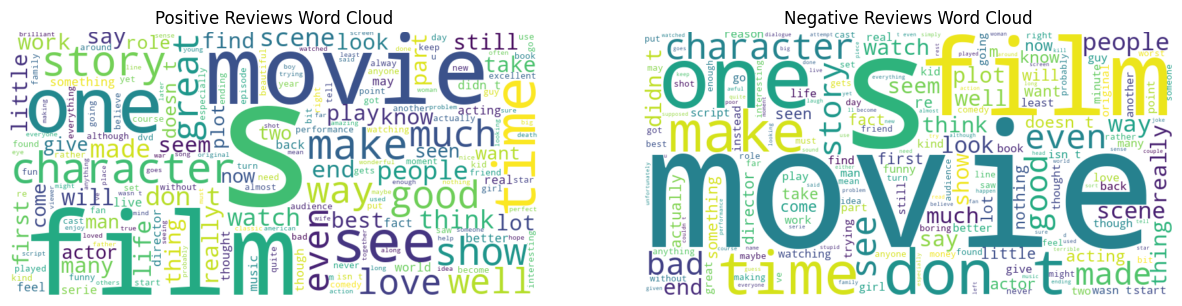

In [66]:
# Plot the word clouds
plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

In [67]:
conclusion = f"""
Conclusion

Summary of Findings
In this project, we performed sentiment analysis on the IMDB Movie Reviews Dataset, which contains 50,000 movie reviews. The key steps included text preprocessing, classification using the Naive Bayes algorithm, and model evaluation.

- Text Preprocessing: We cleaned the text data by removing HTML tags, converting text to lowercase, and removing punctuation and special characters.
- Classification: We implemented the Naive Bayes algorithm for sentiment classification. The text data was vectorized using TF-IDF.
- Model Evaluation: The model's performance was evaluated using accuracy, precision, recall, and F1-score. We also performed hyperparameter tuning and cross-validation to ensure consistent performance.

Insights Gained
- The Naive Bayes classifier achieved an accuracy of {accuracy:.2f}.
- The cross-validation scores were {cv_scores} with a mean score of {np.mean(cv_scores):.2f}.
- The classification report is as follows:

{report}

- The confusion matrix is visualized below:

{conf_matrix}

- Here are some examples of misclassified reviews:
"""

for i in range(5):
    review = (f"Review: {misclassified.iloc[i]}")
    true_label = (f"True Label: {misclassified_true_labels.iloc[i]}")
    pred_label = (f"Predicted Label: {misclassified_pred_labels[i]}")
    seperator = ("="*80)
    conclusion += f"{review}\n{true_label}\n{pred_label}\n{seperator}\n"

conclusion += """
Future Improvements
- Advanced Models: Experimenting with more advanced models such as LSTM, BERT, or other deep learning approaches could potentially improve the classification accuracy.
- Feature Engineering: Additional feature engineering techniques, such as incorporating n-grams or sentiment lexicons, could enhance the model's performance.
- Data Augmentation: Increasing the dataset size through data augmentation techniques or by including more diverse sources of reviews could provide more robust training data.

Final Thoughts
This project demonstrated the practical application of text preprocessing, machine learning, and model evaluation techniques for sentiment analysis. The insights gained from the analysis can be valuable for various applications, such as recommendation systems, market research, and customer feedback analysis.
"""

print(conclusion)


Conclusion

Summary of Findings
In this project, we performed sentiment analysis on the IMDB Movie Reviews Dataset, which contains 50,000 movie reviews. The key steps included text preprocessing, classification using the Naive Bayes algorithm, and model evaluation.

- Text Preprocessing: We cleaned the text data by removing HTML tags, converting text to lowercase, and removing punctuation and special characters.
- Classification: We implemented the Naive Bayes algorithm for sentiment classification. The text data was vectorized using TF-IDF.
- Model Evaluation: The model's performance was evaluated using accuracy, precision, recall, and F1-score. We also performed hyperparameter tuning and cross-validation to ensure consistent performance.

Insights Gained
- The Naive Bayes classifier achieved an accuracy of 0.85.
- The cross-validation scores were [0.8528 0.8526 0.8462 0.8444 0.859 ] with a mean score of 0.85.
- The classification report is as follows:

              precision    rec